**Download the dataset from here** -> https://www.kaggle.com/uciml/adult-census-income

## What is boosting?
Boosting refers to a family of algorithms that are able to convert weak learners to strong learners.

The main principle of boosting is to fit a sequence of weak learners (models that are only slightly better than random guessing, such as small decision trees) to weighted versions of the data, where more weight is given to examples that were mis-classified by earlier rounds. 

The predictions are then combined through a weighted majority vote (classification) or a weighted sum (regression) to produce the final prediction. The principal difference between boosting and the committee methods such as bagging is that base learners are trained in sequence on a weighted version of the data.

## We will cover two Algorithm
- LightGBM
- CatBosost

## Load Library

In [312]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

## Load dataset

In [203]:
# Import Data

census_df = pd.read_csv('../input/adult-census-income/adult.csv')

In [204]:
# size of data
census_df.shape

(32561, 15)

In [205]:
# Show first 5 rows

census_df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [206]:
# change columns name
cols = census_df.columns
census_df.columns = cols.str.replace('.','_')

In [207]:
# print some information about data

census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Exploratory data analysis

In [208]:
# check for missing values
census_df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [209]:
# some columns have '?' 

ques = census_df == '?'
ques.sum()

/opt/conda/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [210]:
# check  workclass and occupation both column contain question mark 
compare = census_df[census_df[['workclass', 'occupation']] == '?'].any(axis=1)
census_df[compare]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,>50K
24,61,?,135285,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2603,32,United-States,<=50K
44,71,?,100820,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2489,15,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32534,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32541,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32543,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [211]:
# check with groupby
census_df.groupby(by='workclass')['hours_per_week'].mean()

workclass
?                   31.919390
Federal-gov         41.379167
Local-gov           40.982800
Never-worked        28.428571
Private             40.267096
Self-emp-inc        48.818100
Self-emp-not-inc    44.421881
State-gov           39.031587
Without-pay         32.714286
Name: hours_per_week, dtype: float64

In [212]:
# check the values in workclass 
census_df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [213]:
# will eliminte '?' rows
df = census_df[census_df.occupation !='?']

ques = df == '?'
ques.sum()

/opt/conda/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


age                 0
workclass           0
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation          0
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    556
income              0
dtype: int64

In [214]:
# check the most fequent value in native_country columns

df.native_country.max()

'Yugoslavia'

In [215]:
# replace country with the most frequent value
df.native_country = df.loc[:, ['native_country']].replace('?', 'Yugoslavia')

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [216]:
df.native_country.unique()

array(['United-States', 'Yugoslavia', 'Mexico', 'Greece', 'Vietnam',
       'China', 'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago',
       'Canada', 'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland',
       'Iran', 'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras',
       'Cuba', 'Ireland', 'Cambodia', 'Peru', 'Nicaragua',
       'Dominican-Republic', 'Haiti', 'Hungary', 'Columbia', 'Guatemala',
       'El-Salvador', 'Jamaica', 'Ecuador', 'France', 'Portugal', 'Laos',
       'Thailand', 'Outlying-US(Guam-USVI-etc)', 'Scotland'], dtype=object)

In [217]:
# # print some stastical about data
census_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


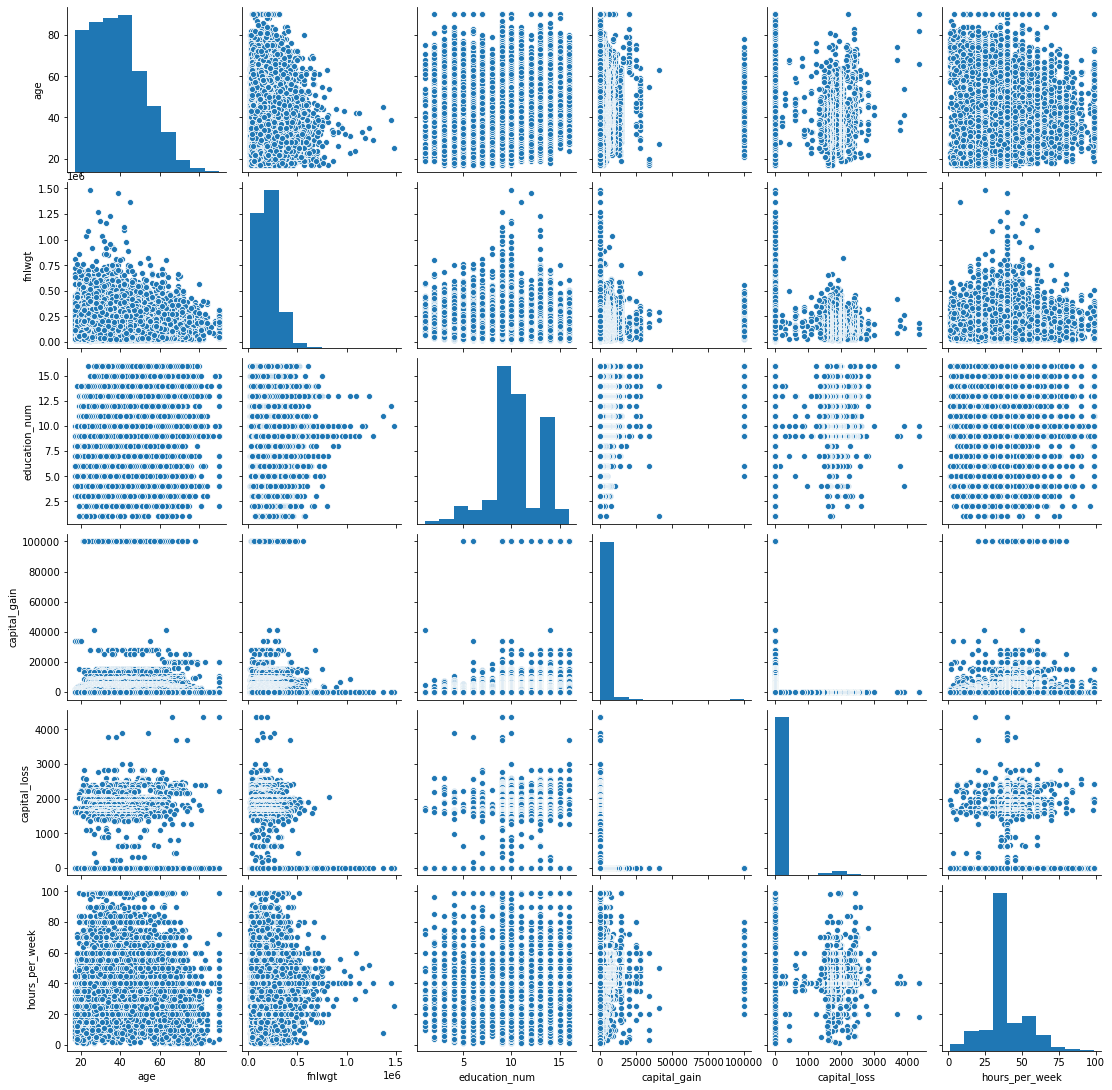

In [218]:
# pair plot
sns.pairplot(census_df)

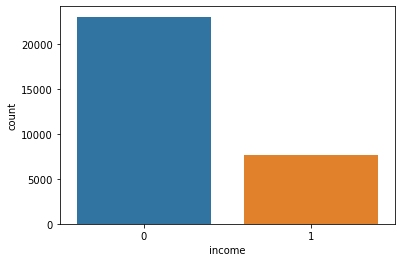

In [280]:
# check the count of target variable
sns.countplot(df.income)

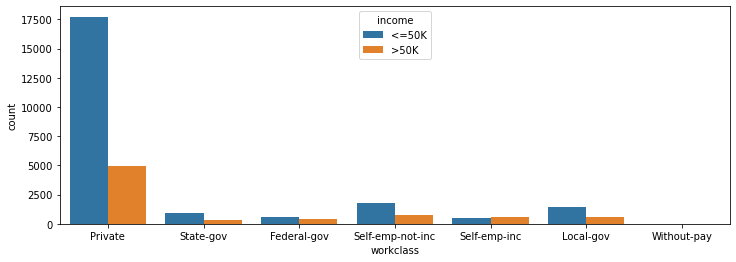

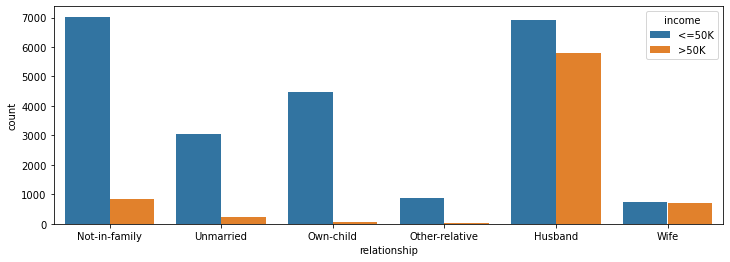

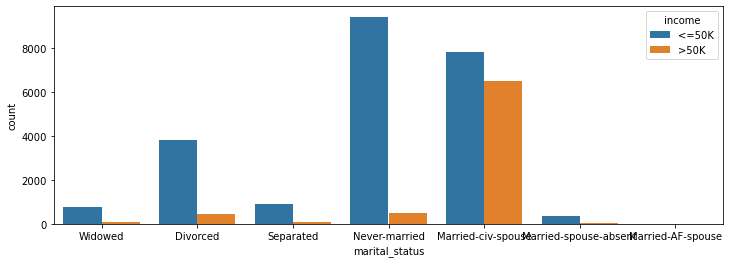

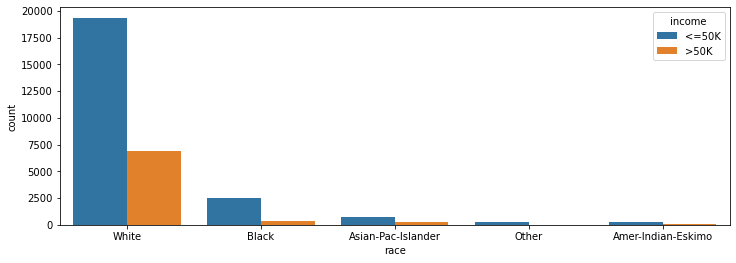

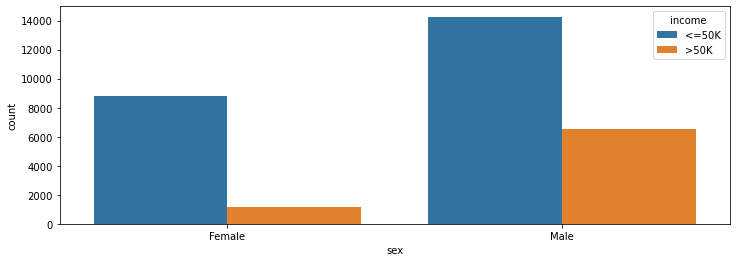

In [219]:
# count plot against income
cols = ['workclass', 'relationship', 'marital_status', 'race', 'sex']

for c in cols:
    plt.figure(figsize=(12,4))
    sns.countplot(x=c, hue='income', data=df)
    plt.show()

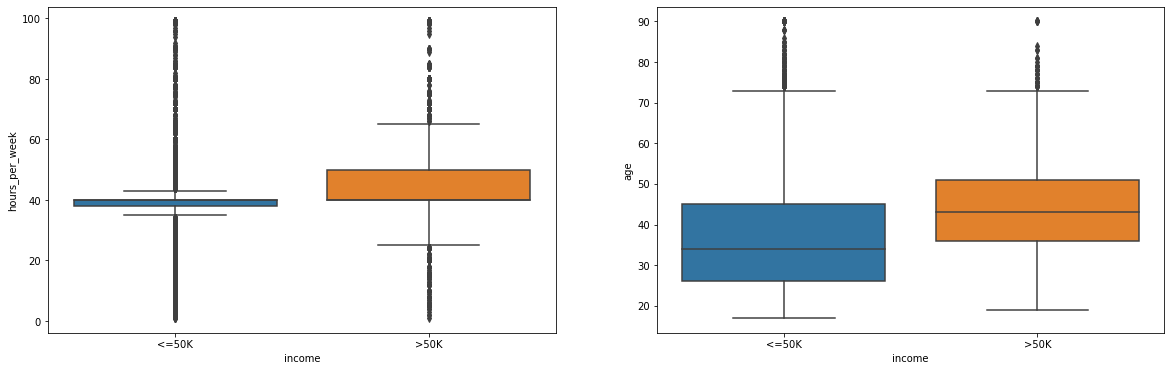

In [220]:
# check for outliers
fig, (a,b)= plt.subplots(1,2,figsize=(20,6))
sns.boxplot(y='hours_per_week',x='income',data=df,ax=a)
sns.boxplot(y='age',x='income',data=df,ax=b)
plt.show()

[(15.0, 0.0)]

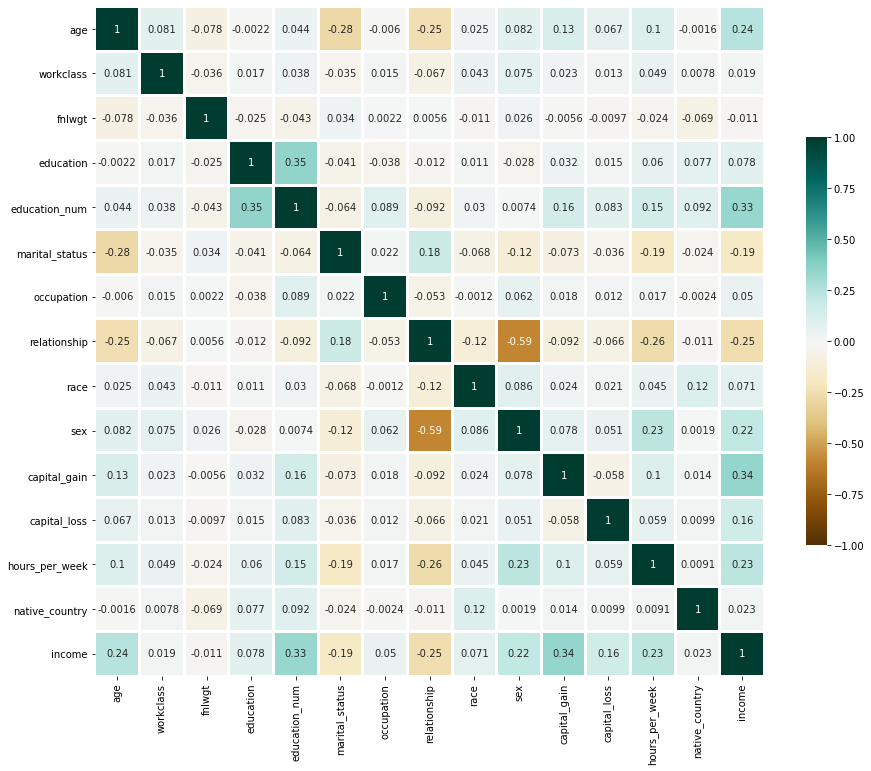

In [231]:
#  Correlation Matrix with Spearman method

plt.figure(figsize=(15,15))

sns.heatmap(df.corr(), annot=True, cmap='BrBG', vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(15, 0))

## Encoding

In [246]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# transform categorical value to numeric
for i in df.columns:
    df[i] = le.fit_transform(df[i])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [248]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,65,2,6157,11,8,6,3,1,4,0,0,89,17,38,0
3,37,2,6632,5,3,0,6,4,4,0,0,88,39,38,0
4,24,2,15952,15,9,5,9,3,4,0,0,88,39,38,0
5,17,2,13423,11,8,0,7,4,4,0,0,87,44,38,0
6,21,2,7370,0,5,5,0,4,4,1,0,87,39,38,0


## split data

In [249]:
x = df.iloc[:, :-1]
y = df['income']

In [250]:
# train and test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

## lightGBM

In [325]:
%time
# create an object
lgb = LGBMClassifier(learning_rate= 0.1,
 boosting_type= 'gbdt',
 objective= 'binary',
 metric= 'binary_logloss',
 sub_feature= 0.5,
 num_leaves= 8,
 min_data= 50,
 max_depth= 15)


# fit the data

d_train = lgb.fit(x_train, y_train)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.5 µs


In [310]:
# predict the target on the train dataset

y_pred_lgb = lgb.predict(x_test)


#Accuracy
accuracy = accuracy_score(y_pred_lgb,y_test)
print('Accuracy Score : ', round(accuracy, 2) * 100)

#Confusion matrix
cm = confusion_matrix(y_test, y_pred_lgb)
print('\nConfusion matric :\n ', cm)

Accuracy Score :  87.0

Confusion matric :
  [[6570  362]
 [ 880 1404]]


## catBoost

In [316]:
# find out the indices of categorical variables
categorical_var = np.where(x_train.dtypes != np.float)[0]
print('\nCategorical Variables indices : ',categorical_var)


Categorical Variables indices :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


In [334]:
%time
# create an object
cb = CatBoostClassifier(iterations=90, learning_rate=0.7, logging_level='Silent')

# fit the model
cb.fit(x_train, y_train, cat_features=categorical_var, eval_set=(x_test, y_test),verbose=False)

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 13.8 µs


In [333]:
# predict
y_predict_cb = cb.predict(x_test)
print('\nTarget on train data',y_predict_cb) 

# Accuray Score on train dataset
accuracy_train_cb = accuracy_score(y_predict_cb, y_test)
print('\naccuracy_score on train dataset : ', round(accuracy_train_cb,2)* 100)

#Confusion matrix
cm = confusion_matrix(y_test, y_predict_cb)
print('\nConfusion matric :\n ', cm)


Target on train data [0 0 0 ... 0 0 0]

accuracy_score on train dataset :  87.0

Confusion matric :
  [[6547  385]
 [ 809 1475]]


### Observation

- Both LightGBM and catBoost are same when it comes to  accuracy score
- LightGBM took less time to train the model then catBoost